In [352]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [246]:
df_lead = pd.read_csv(r"C:\Users\Kiran jha\OneDrive\Desktop\Leads.csv")
pd.set_option('display.max_columns', None)
df_lead

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occu

In [247]:
df_lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [248]:
df_lead.shape

(9240, 37)

In [249]:
df_lead.size

341880

In [250]:
len(df_lead.index)

9240

In [251]:
len(df_lead.columns)

37

In [252]:
df_lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [253]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [254]:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [255]:
round(df_lead.isnull().sum()/df_lead.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [256]:
sum(df_lead.duplicated(subset = 'Lead Number')) == 0

True

In [257]:
df_lead.drop(['Lead Number'], 1, inplace = True)

In [259]:
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    df_lead[feature] = df_lead[feature].apply(lambda x : 1 if x=='Yes' else 0)
df_lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0

In [260]:
df_lead.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [261]:
for col in df_lead.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print(df_lead[col].value_counts(normalize= True))

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
Last Activity
Email Opened                    0.376163
SMS Sent                        0.300427
Ol

In [262]:
df_lead = df_lead.replace('Select', np.nan)
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   int64  
 4   Do Not Call                                    9240 non-null   int64  
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [263]:
df_lead = df_lead.drop(df_lead.loc[:,list(round(df_lead.isnull().sum()/df_lead.shape[0], 2)>0.70)].columns, 1)

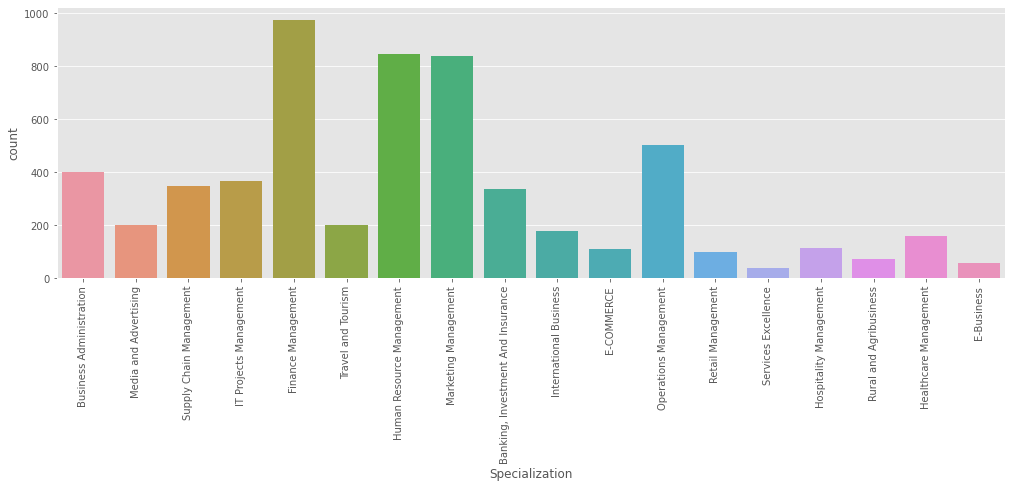

In [264]:
plt.figure(figsize=(17,5))
sns.countplot(df_lead['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [265]:
df_lead["Specialization"].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [266]:
df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan, 'Other')

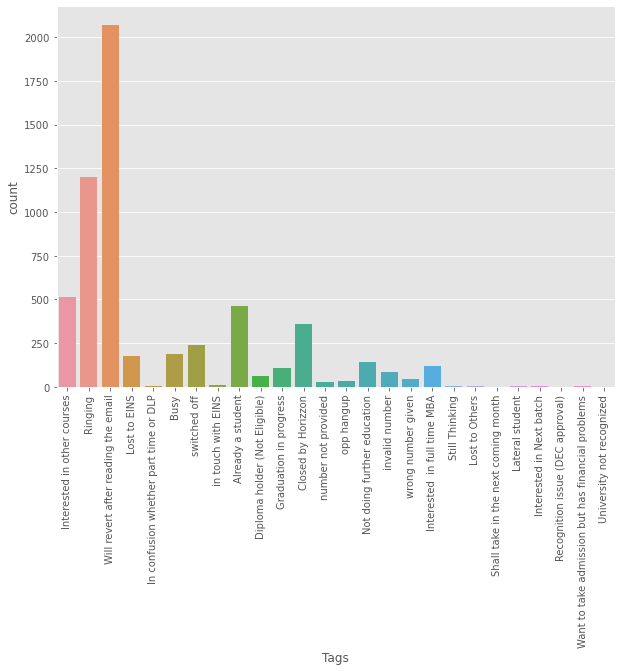

In [267]:
plt.figure(figsize=(10,7))
sns.countplot(df_lead['Tags'])
plt.xticks(rotation=90)
plt.show()

In [268]:
df_lead["Tags"].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [269]:
df_lead['Tags'] = df_lead['Tags'].replace(np.nan, 'Will revert after reading the email')

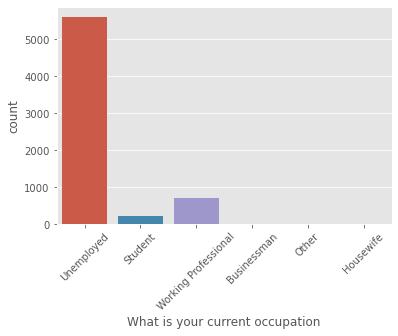

In [152]:
sns.countplot(df_lead['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [270]:
df_lead["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [271]:
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Unemployed')

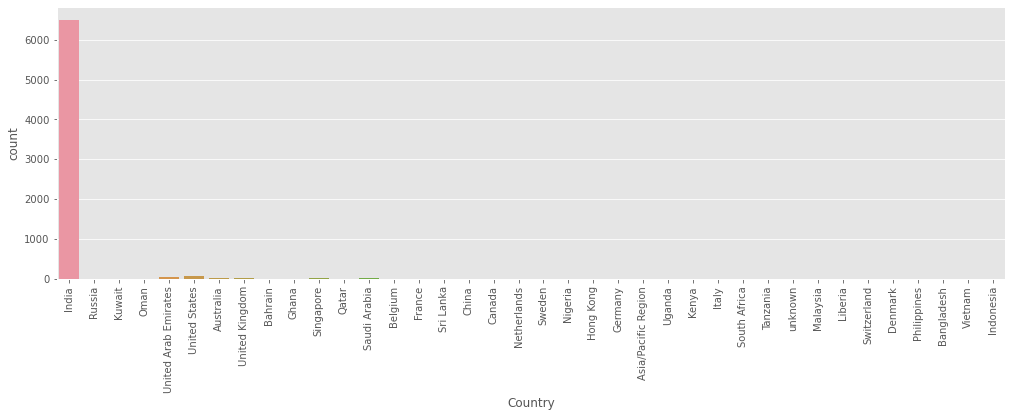

In [272]:
plt.figure(figsize=(17,5))
sns.countplot(df_lead['Country'])
plt.xticks(rotation=90)
plt.show()

In [273]:
df_lead["Country"].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [274]:
df_lead['Country'] = df_lead['Country'].replace(np.nan, 'India')

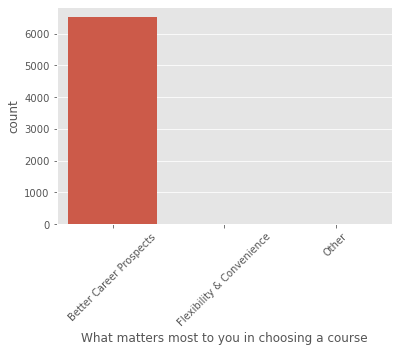

In [275]:
sns.countplot(df_lead['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [276]:
df_lead["What matters most to you in choosing a course"].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [277]:
df_lead['What matters most to you in choosing a course'] = df_lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

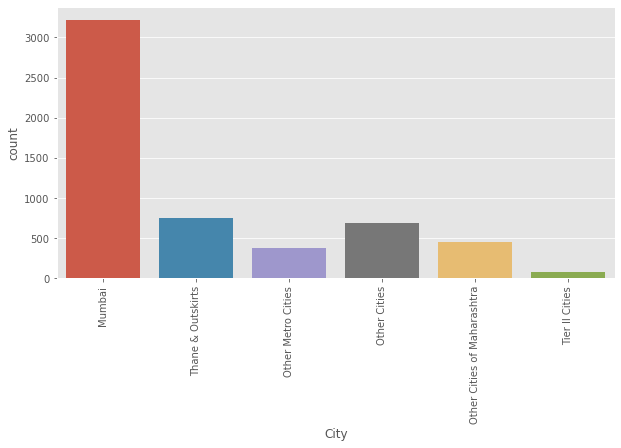

In [278]:
plt.figure(figsize=(10,5))
sns.countplot(df_lead['City'])
plt.xticks(rotation=90)
plt.show()

In [279]:
df_lead["City"].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [280]:
df_lead['City'] = df_lead['City'].replace(np.nan, 'Mumbai')

In [281]:
df_lead['Lead Quality'] = df_lead['Lead Quality'].replace(np.nan, 'Not Sure')

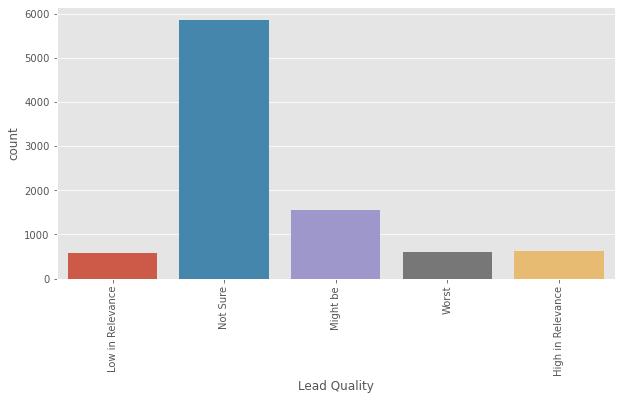

In [282]:
plt.figure(figsize=(10,5))
sns.countplot(df_lead['Lead Quality'])
plt.xticks(rotation=90)
plt.show()

In [283]:
df_lead = df_lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [284]:
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [285]:
df_lead.dropna(inplace=True)
df_lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India                    Other                      Unemployed   
1   India                    Other                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                    Other                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                  0                          0  Mumbai   
1                                  0                          0  Mumbai   
2                                  0                          0  Mumbai   
3                                  0                          0  Mumbai   
4                                  0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                   

In [286]:
round(df_lead.isnull().sum()/len(df_lead.index),2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [287]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   int64  
 4   Do Not Call                                    9074 non-null   int64  
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [288]:
df_lead["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [289]:
converted = df_lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

counts
unique_values        
0                5639
1                3435

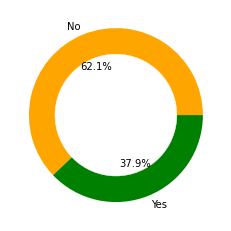

In [290]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['orange','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

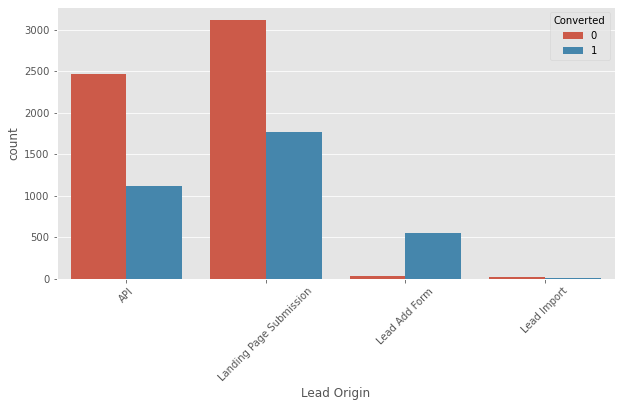

In [291]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_lead)
plt.xticks(rotation = 45)
plt.show()

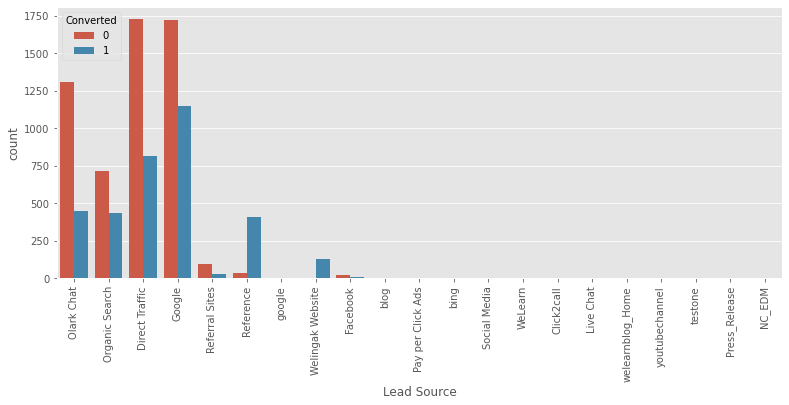

In [292]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

In [293]:
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['google'], 'Google')

In [294]:
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

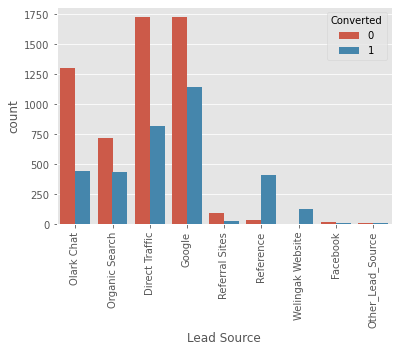

In [295]:
sns.countplot(x="Lead Source", hue="Converted", data= df_lead)
plt.xticks(rotation='vertical')
plt.show()

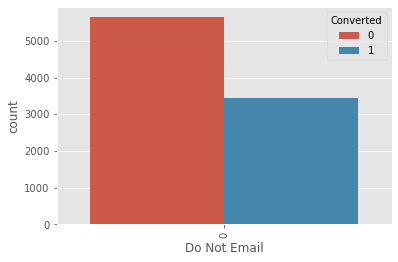

In [296]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

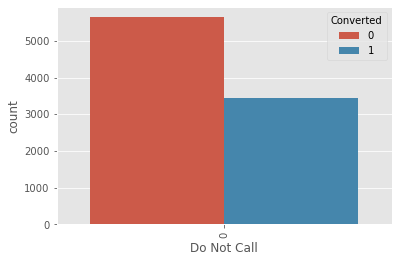

In [297]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

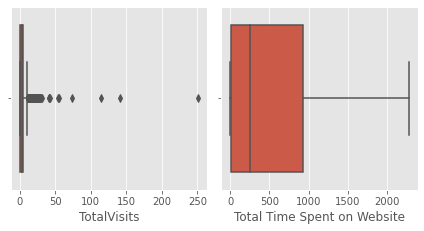

In [298]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df_lead[feature])
    plt.tight_layout()

In [299]:
df_lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [300]:
q1 = df_lead["TotalVisits"].quantile(0.95)
df_lead["TotalVisits"][df_lead["TotalVisits"] >= q1] = q1

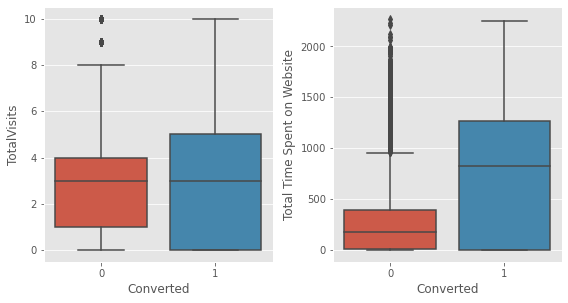

In [301]:
fig=plt.subplots(figsize=(8, 8))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = df_lead)
    plt.tight_layout()

In [302]:
df_lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

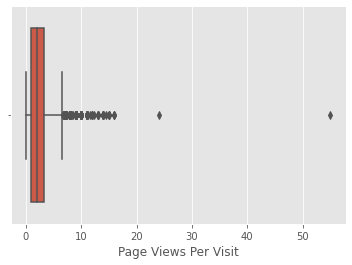

In [303]:
sns.boxplot(df_lead['Page Views Per Visit'])
plt.show()

In [304]:
percentiles = df_lead['Page Views Per Visit'].quantile([0.05,0.95]).values
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

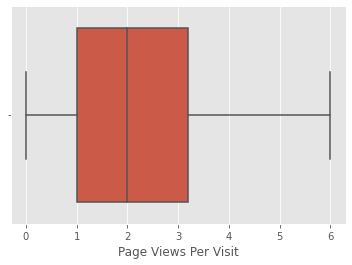

In [305]:
sns.boxplot(df_lead['Page Views Per Visit'])
plt.show()

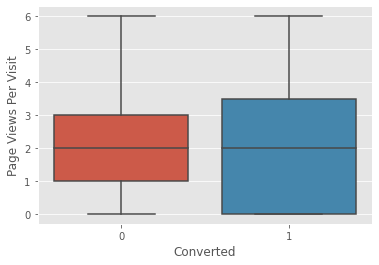

In [306]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df_lead)
plt.show()

In [307]:
df_lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

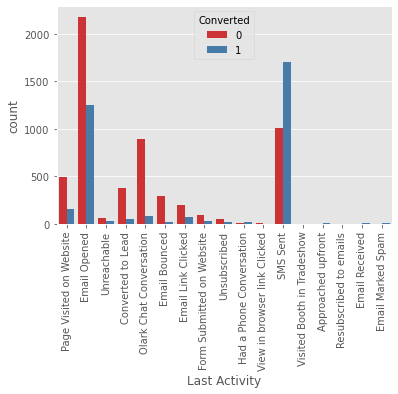

In [308]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df_lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [309]:
df_lead['Last Activity'] = df_lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

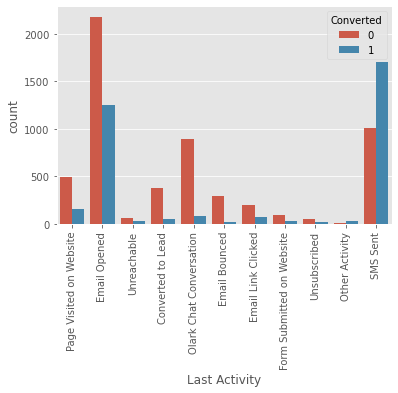

In [310]:
sns.countplot(x="Last Activity", hue="Converted", data= df_lead)
plt.xticks( rotation='vertical')
plt.show()

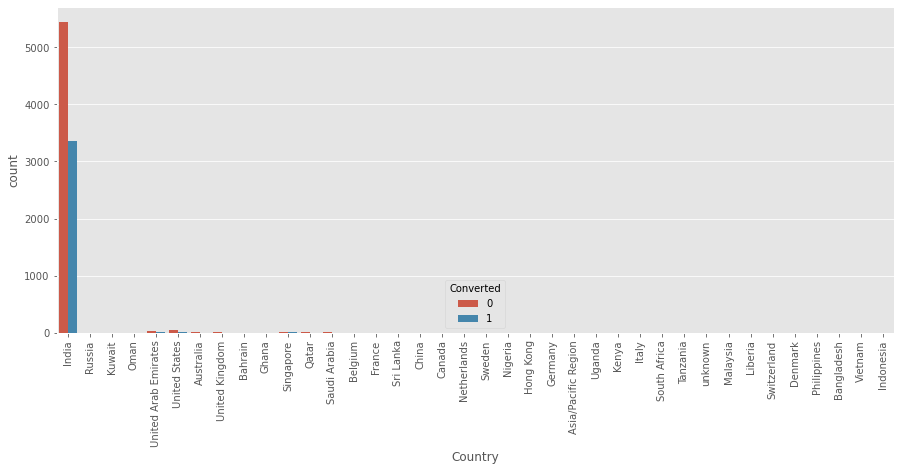

In [194]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

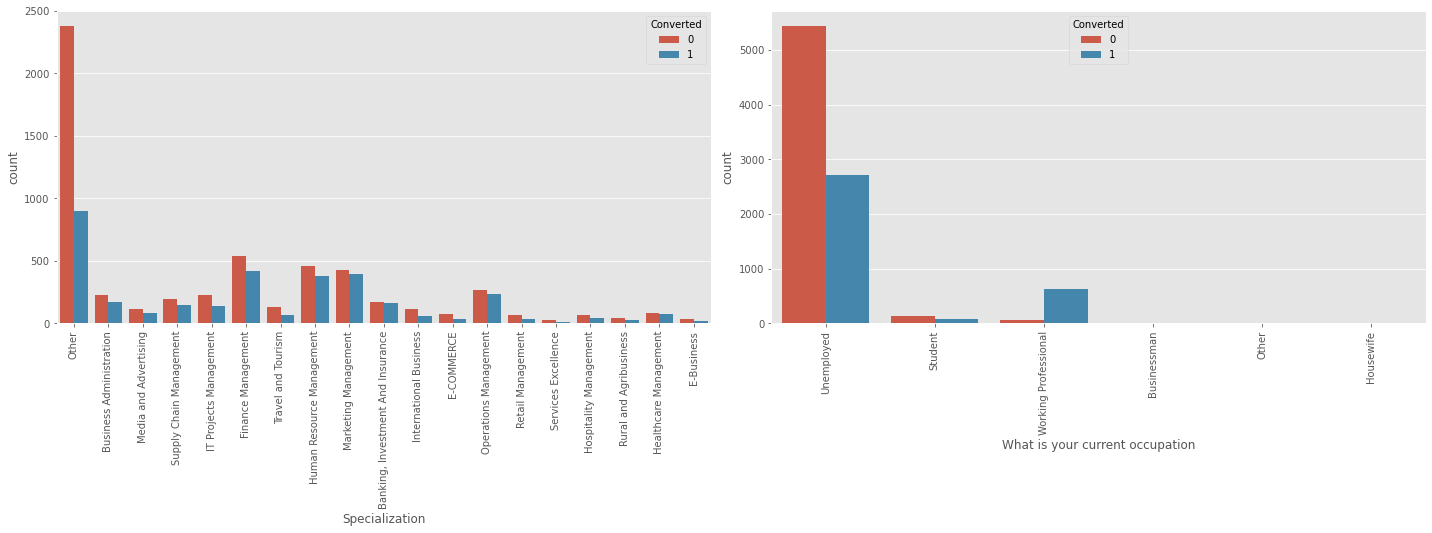

In [311]:
fig=plt.subplots(figsize=(20, 12))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df_lead)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

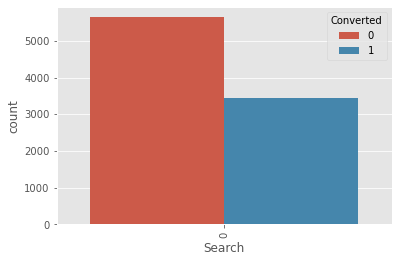

In [312]:
sns.countplot(x = "Search", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

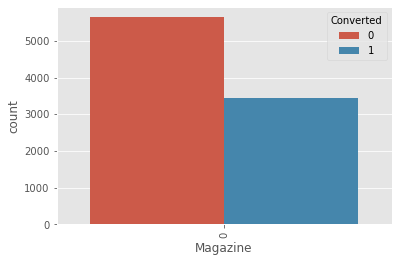

In [313]:
sns.countplot(x = "Magazine", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

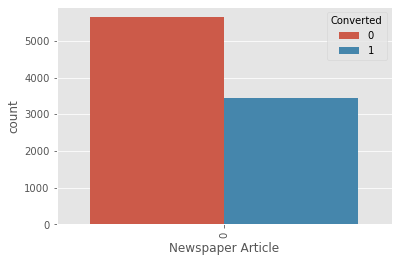

In [314]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

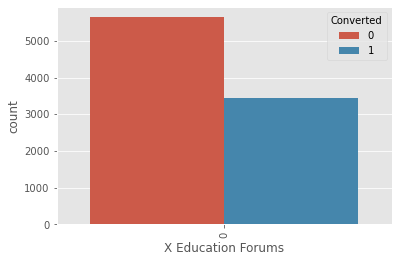

In [315]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

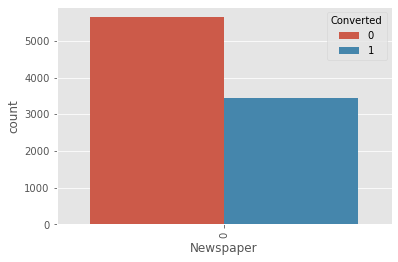

In [316]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

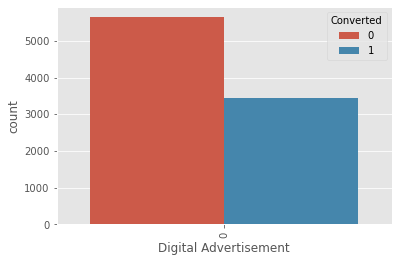

In [317]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

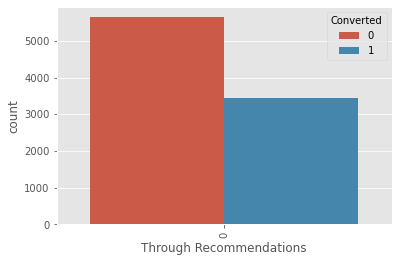

In [318]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data= df_lead)
plt.xticks(rotation = 90)
plt.show()

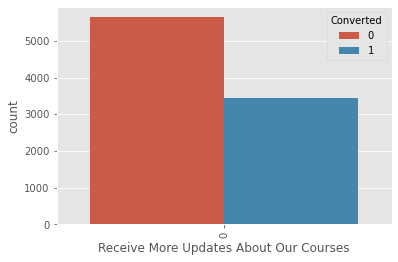

In [319]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

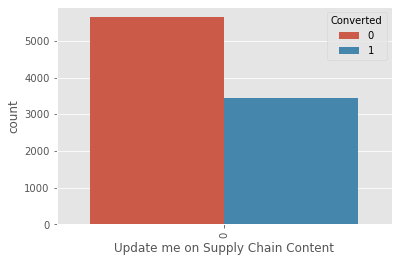

In [320]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

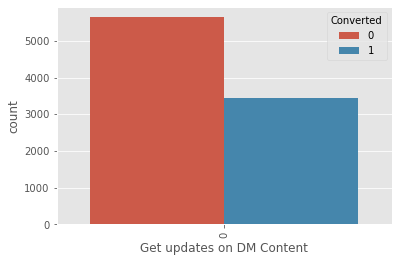

In [321]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

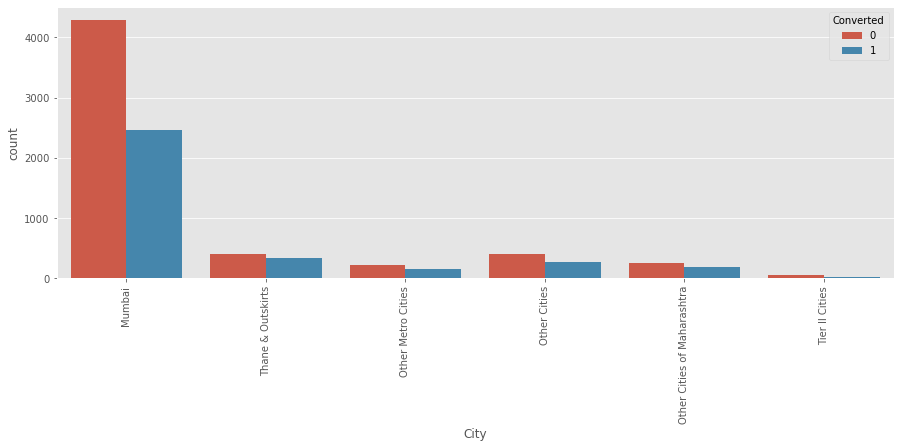

In [322]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

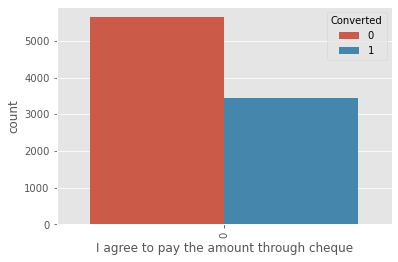

In [323]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

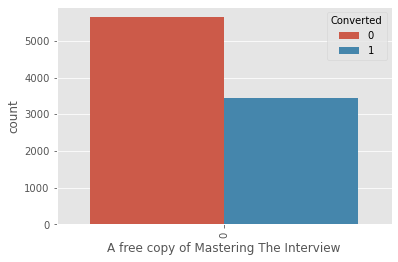

In [324]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

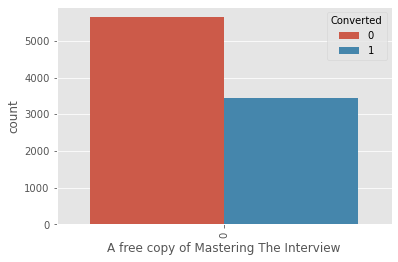

In [325]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

In [326]:
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace("Other", 'Other_Occupation')

In [327]:
df_lead[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

Search  Magazine  Newspaper Article  X Education Forums  Newspaper  \
count  9074.0    9074.0             9074.0              9074.0     9074.0   
mean      0.0       0.0                0.0                 0.0        0.0   
std       0.0       0.0                0.0                 0.0        0.0   
min       0.0       0.0                0.0                 0.0        0.0   
25%       0.0       0.0                0.0                 0.0        0.0   
50%       0.0       0.0                0.0                 0.0        0.0   
75%       0.0       0.0                0.0                 0.0        0.0   
max       0.0       0.0                0.0                 0.0        0.0   

       Digital Advertisement  Through Recommendations  \
count                 9074.0                   9074.0   
mean                     0.0                      0.0   
std                      0.0                      0.0   
min                      0.0                      0.0   
25%                      0.0                      0.0   
50%                      0.0                      0.0   
75%                      0.0                      0.0   
max                      0.0                      0.0   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                                  9074.0  
mean                                      0.0  
std                                       0.0  
min                                       0.0  
25%                                       0.0  
50%                                       0.0  
75%                                       0.0  
max                                       0.0

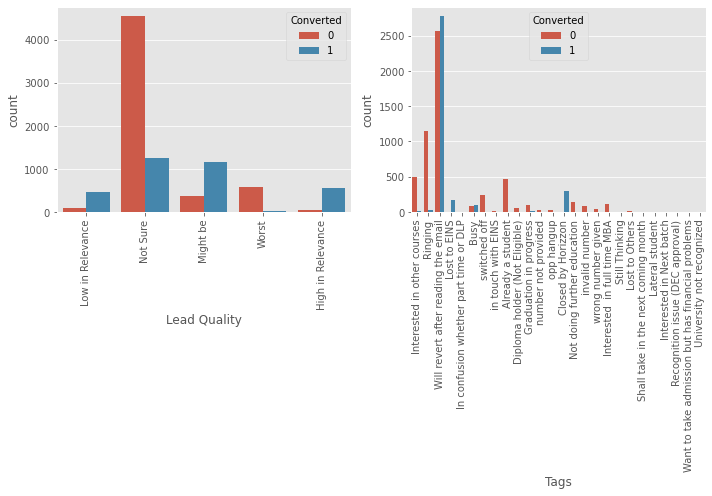

In [328]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df_lead)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

In [329]:
df_lead['Tags'] = df_lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

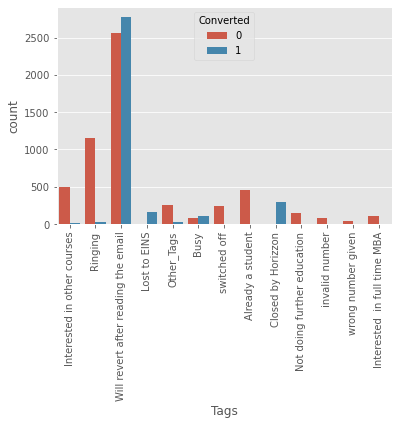

In [330]:
sns.countplot(x="Tags", hue="Converted", data= df_lead)
plt.xticks( rotation='vertical')
plt.show()

In [331]:
df_lead = df_lead.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

df_lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                    Other                      Unemployed   
1                    Other                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                    Other                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [332]:
cat_cols= df_lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

In [333]:
dummy = pd.get_dummies(df_lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()


Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Specia

In [334]:
df_lead = df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
df_lead.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  
0                            0                   0.0  
1                          674                   2.5  
2                         1532                   2.0  
3                          305                   1.0  
4                         1428                   1.0

In [335]:
df_lead = pd.concat([df_lead, dummy], axis=1)
df_lead.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0               

In [336]:
X = df_lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3       

In [337]:
y = df_lead['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [339]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   int64  
 3   Page Views Per Visit                                  6351 non-null   float64
 4   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 6   Lead Origin_Lead Import                               6351 non-null   uint8  
 7   Lead Source_Facebook                                  6351 non-null   uint8  
 8   Lead Source_Google                                    6

In [340]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             0    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       1   
4750                     0                   0                       0   
7987                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Other_Lead_Source  \
3009                           0                              0   
1012                           0                              0   
9226                           0                              0   
4750                           0                              0   
7987                           0                              0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3009                             0                            0   
1012                             0                            1   
9226                             0                            0   
4750                             0                            0   
7987                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3009                                 0                           1   
1012                                 0                           0   
9226                                 0                           0   
4750                                 0                           0   
7987                                 0                           0   

      Last Activity_Form Submitted on Website  \
3009                                        0   
1012                                        0   
9226                                        0   
4750                                        0   
7987                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
3009                                      0                             0   
1012                                      0                             0   
9226                                      0                             0   
4750                                      0                             0   
7987                                      0                             0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3

In [341]:
print("Conversion rate = ", (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100)

Conversion rate =  37.85541106458012


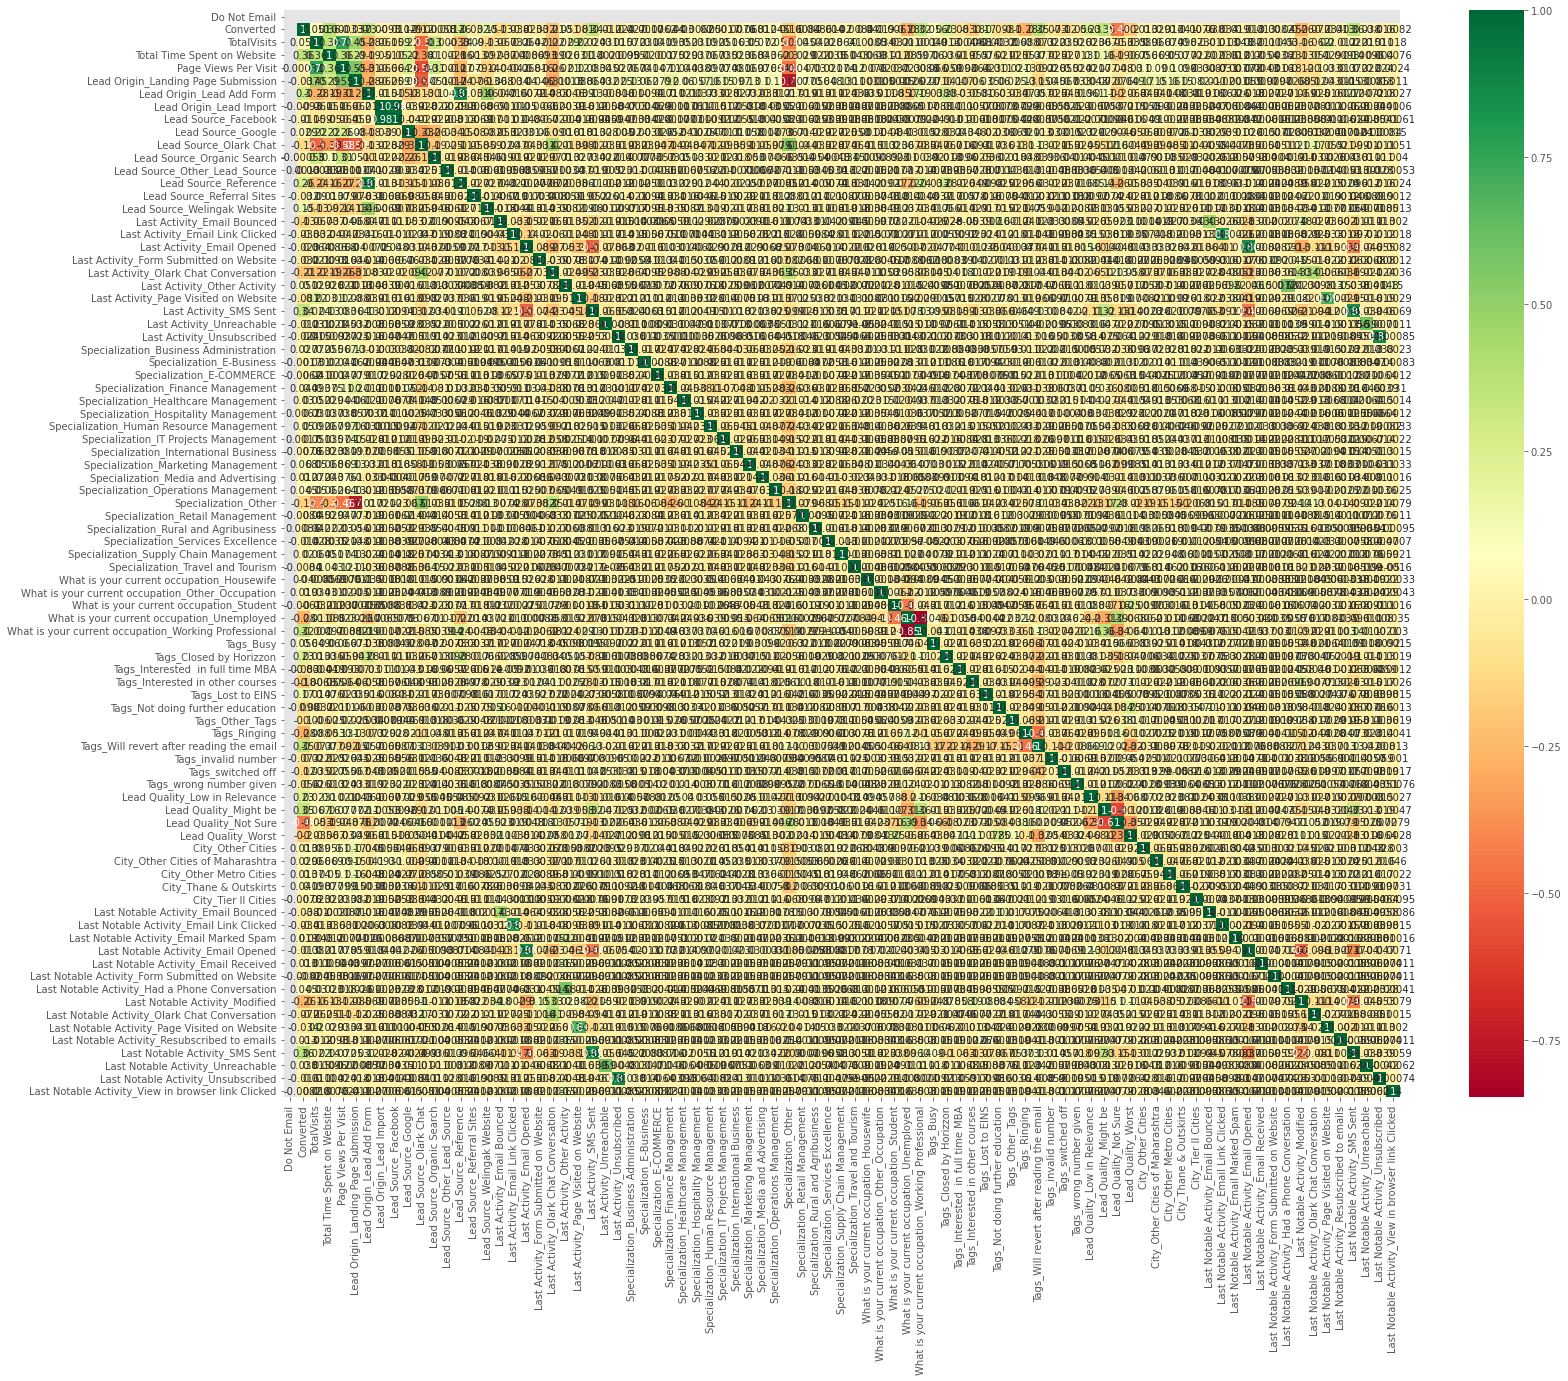

In [342]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_lead.corr(), cmap='RdYlGn', annot = True)
plt.show()

In [343]:
print('Total number of columns after One-Hot Encoding : ',len(df_lead.columns))

Total number of columns after One-Hot Encoding :  86


In [344]:
conv_corr = df_lead.corr()
conv_corr

Do Not Email  Converted  \
Do Not Email                                                 NaN        NaN   
Converted                                                    NaN   1.000000   
TotalVisits                                                  NaN   0.050742   
Total Time Spent on Website                                  NaN   0.359261   
Page Views Per Visit                                         NaN   0.000329   
...                                                          ...        ...   
Last Notable Activity_Resubscribed to emails                 NaN   0.013451   
Last Notable Activity_SMS Sent                               NaN   0.360233   
Last Notable Activity_Unreachable                            NaN   0.037893   
Last Notable Activity_Unsubscribed                           NaN  -0.016286   
Last Notable Activity_View in browser link Clicked           NaN  -0.008194   

                                                    TotalVisits  \
Do Not Email                                                NaN   
Converted                                              0.050742   
TotalVisits                                            1.000000   
Total Time Spent on Website                            0.361207   
Page Views Per Visit                                   0.766567   
...                                                         ...   
Last Notable Activity_Resubscribed to emails          -0.012052   
Last Notable Activity_SMS Sent                         0.021815   
Last Notable Activity_Unreachable                      0.015285   
Last Notable Activity_Unsubscribed                     0.010927   
Last Notable Activity_View in browser link Clicked     0.018154   

                                                    Total Time Spent on Website  \
Do Not Email                                                                NaN   
Converted                                                              0.359261   
TotalVisits                                                            0.361207   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.364735   
...                                                                         ...   
Last Notable Activity_Resubscribed to emails                          -0.009298   
Last Notable Activity_SMS Sent                                         0.137169   
Last Notable Activity_Unreachable                                      0.009594   
Last Notable Activity_Unsubscribed                                     0.003951   
Last Notable Activity_View in browser link Clicked                    -0.007584   

                                                    Page Views Per Visit  \
Do Not Email                                                         NaN   
Converted                                                       0.000329   
TotalVisits                                                     0.766567   
Total Time Spent on Website                                     0.364735   
Page Views Per Visit                                            1.000000   
...                                                                  ...   
Last Notable Activity_Resubscribed to emails                   -0.013283   
Last Notable Activity_SMS Sent                                  0.071517   
Last Notable Activity_Unreachable                               0.021695   
Last Notable Activity_Unsubscribed                              0.024119   
Last Notable Activity_View in browser link Clicked              0.002369   

                                                    Lead Origin_Landing Page Submission  \
Do Not Email                                                                        NaN   
Converted                                                                     -0.037481   
TotalVisits                                                                    0.454350   
Total Time Spent on Webs

In [345]:
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                             0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800686
TotalVisits                            Page Views Per Visit                              0.766567
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.691811
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.594369
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.576457
dtype: float64

In [346]:
conv_corr = X_train.corr()

In [347]:
X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [348]:
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [349]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                              0.979718
Lead Origin_Lead Add Form              Lead Source_Reference                             0.859537
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.858361
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.851814
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.846581
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.804444
TotalVisits                            Page Views Per Visit                              0.766735
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.685169
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.607326
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.593057
dtype: float64

In [360]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [361]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 40),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Other_Lead_Source', False, 9),
 ('Lead Source_Reference', False, 34),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_

In [362]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Marketing Management', 'Specialization_Other',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_Tags', 'Tags_Ringin

In [363]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other_Lead_Source', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'What is your cur

In [364]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1296.1
Date:                Mon, 17 Oct 2022   Deviance:                       2592.1
Time:                        21:44:23   Pearson chi2:                 2.97e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1746      1.358      0.865      0.387      -1.488       3.837
Total Time Spent on Website                              1.1423      0.062     18.387      0.000       1.021       1.264
Lead Origin_Landing Page Submission                     -1.1565      0.208     -5.563      0.000      -1.564      -0.749
Lead Origin_Lead Add Form                                1.2039      0.392      3.073      0.002       0.436       1.972
Lead Origin_Lead Import                                  0.9478      0.783      1.211      0.226      -0.586       2.482
Lead Source_Olark Chat                                   0.8644      0.165      5.237      0.000       0.541       1.188
Lead Source_Welingak Website                             3.7581      0.829      4.531      0.000       2.133       5.384
Last Activity_Email Bounced                             -1.0281      0.481     -2.138      0.032      -1.970      -0.086
Last Activity_Email Link Clicked                        -0.4334      0.318     -1.363      0.173      -1.057       0.190
Last Activity_Olark Chat Conversation                   -0.1894      0.265     -0.716      0.474      -0.708       0.329
Last Activity_Other Activity                             1.5341      0.866      1.771      0.076      -0.163       3.232
Last Activity_SMS Sent                                   1.9597      0.120     16.359      0.000       1.725       2.194
Last Activity_Unreachable                                0.9535      0.465      2.052      0.040       0.043       1.864
Specialization_E-COMMERCE                                0.8873      0.480      1.850      0.064      -0.053       1.827
Specialization_International Business                   -0.5492      0.354     -1.553      0.120      -1.242       0.144
Specialization_Marketing Management                      0.3721      0.198      1.880      0.060      -0.016       0.760
Specialization_Other                                    -0.4661      0.202     -2.302      0.021      -0.863      -0.069
Specialization_Travel and Tourism                       -0.4123      0.409     -1.008      0.313      -1.214       0.389
What is your current occupation_Student                 -1.3995      1.186     -1.180      0.238      -3.724       0.925
What is your current occupation_Unemployed              -1.9625      1.070     -1.834      0.067      -4.059       0.134
What is your current occupation_Working Professional    -0.6800      1.112     -0.612      0.541      -2.859       1.499
Tags_Busy                                                3.9299      0.832      4.722      0.000       2.299       5.561
Tags_Closed by Horizzon                                  9

In [365]:
col= col.drop('Tags_invalid number')
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Marketing Management', 'Specialization_Other',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_Tags', 'Tags_Ringin

In [366]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1297.7
Date:                Mon, 17 Oct 2022   Deviance:                       2595.4
Time:                        21:44:51   Pearson chi2:                 2.93e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3353      1.354      0.248      0.804      -2.318       2.989
Total Time Spent on Website                              1.1417      0.062     18.391      0.000       1.020       1.263
Lead Origin_Landing Page Submission                     -1.1566      0.208     -5.563      0.000      -1.564      -0.749
Lead Origin_Lead Add Form                                1.2067      0.392      3.082      0.002       0.439       1.974
Lead Origin_Lead Import                                  0.9472      0.782      1.211      0.226      -0.586       2.480
Lead Source_Olark Chat                                   0.8635      0.165      5.235      0.000       0.540       1.187
Lead Source_Welingak Website                             3.7528      0.829      4.526      0.000       2.128       5.378
Last Activity_Email Bounced                             -1.0334      0.481     -2.150      0.032      -1.976      -0.091
Last Activity_Email Link Clicked                        -0.4344      0.318     -1.366      0.172      -1.058       0.189
Last Activity_Olark Chat Conversation                   -0.1935      0.264     -0.732      0.464      -0.712       0.325
Last Activity_Other Activity                             1.5409      0.868      1.774      0.076      -0.161       3.243
Last Activity_SMS Sent                                   1.9487      0.119     16.319      0.000       1.715       2.183
Last Activity_Unreachable                                0.9507      0.464      2.047      0.041       0.040       1.861
Specialization_E-COMMERCE                                0.8873      0.479      1.851      0.064      -0.052       1.827
Specialization_International Business                   -0.5435      0.354     -1.536      0.124      -1.237       0.150
Specialization_Marketing Management                      0.3757      0.198      1.897      0.058      -0.012       0.764
Specialization_Other                                    -0.4638      0.202     -2.291      0.022      -0.860      -0.067
Specialization_Travel and Tourism                       -0.4095      0.409     -1.001      0.317      -1.211       0.392
What is your current occupation_Student                 -1.3491      1.183     -1.140      0.254      -3.668       0.970
What is your current occupation_Unemployed              -1.9430      1.063     -1.828      0.068      -4.026       0.140
What is your current occupation_Working Professional    -0.6529      1.105     -0.591      0.554      -2.818       1.512
Tags_Busy                                                4.7573      0.837      5.686      0.000       3.117       6.397
Tags_Closed by Horizzon                                  9

In [367]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
18         What is your current occupation_Unemployed  37.16
28           Tags_Will revert after reading the email  15.27
32                              Lead Quality_Not Sure   8.46
1                 Lead Origin_Landing Page Submission   7.54
15                               Specialization_Other   5.20
27                                       Tags_Ringing   4.18
19  What is your current occupation_Working Profes...   3.98
31                              Lead Quality_Might be   2.83
4                              Lead Source_Olark Chat   2.39
33                                 Lead Quality_Worst   2.30
2                           Lead Origin_Lead Add Form   2.26
35                     Last Notable Activity_Modified   2.24
23                   Tags_Interested in other courses   2.20
21                            Tags_Closed by Horizzon   2.08
8               Last Activity_Olark Chat Conversation   2.03
10                             Last Activity_SMS Sent   1.93
17            What is your current occupation_Student   1.77
26                                    Tags_Other_Tags   1.64
29                                  Tags_switched off   1.61
20                                          Tags_Busy   1.50
0                         Total Time Spent on Website   1.45
24                                  Tags_Lost to EINS   1.44
5                        Lead Source_Welingak Website   1.42
36      Last Notable Activity_Olark Chat Conversation   1.34
25                   Tags_Not doing further education   1.28
22                  Tags_Interested  in full time MBA   1.24
14                Specialization_Marketing Management   1.19
6                         Last Activity_Email Bounced   1.17
30                            Tags_wrong number given   1.11
7                    Last Activity_Email Link Clicked   1.07
16                  Specialization_Travel and Tourism   1.05
13              Specialization_International Business   1.05
11                          Last Activity_Unreachable   1.05
12                          Specialization_E-COMMERCE   1.04
3                             Lead Origin_Lead Import   1.04
34                                City_Tier II Cities   1.03
9                        Last Activity_Other Activity   1.02

In [368]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.140840
1012    0.079508
9226    0.002955
4750    0.929243
7987    0.998668
1281    0.984358
2880    0.067135
4971    0.956122
7536    0.994956
1248    0.014175
dtype: float64

In [369]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14084026, 0.07950843, 0.00295451, 0.92924279, 0.99866783,
       0.98435751, 0.06713528, 0.95612177, 0.9949556 , 0.01417514])

In [370]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID
0        0      0.140840         3009
1        0      0.079508         1012
2        0      0.002955         9226
3        1      0.929243         4750
4        1      0.998668         7987

In [371]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [372]:
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID  predicted
0        0      0.140840         3009          0
1        0      0.079508         1012          0
2        0      0.002955         9226          0
3        1      0.929243         4750          1
4        1      0.998668         7987          1

In [373]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3711  194]
 [ 286 2160]]


In [374]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy : 0.9244213509683514


In [375]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [376]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8830744071954211


In [377]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.9503201024327785


In [378]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.04967989756722151


In [379]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.9175870858113849


In [380]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.9284463347510633


In [381]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [382]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

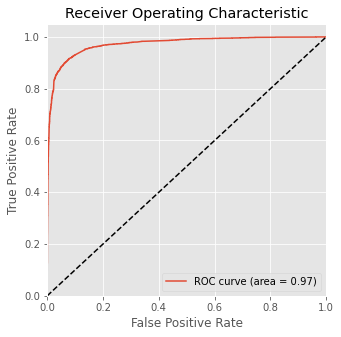

In [383]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [385]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0        0      0.140840         3009          0    1    1    0    0    0   
1        0      0.079508         1012          0    1    0    0    0    0   
2        0      0.002955         9226          0    1    0    0    0    0   
3        1      0.929243         4750          1    1    1    1    1    1   
4        1      0.998668         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    1  
4    1    1    1    1    1

In [387]:
df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy_score= (cm1[0,0]+cm1[1,1])/total1
    specificity_score = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity_score = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision_score = cm1[1,1]/(cm1[1,1]+cm1[0,1])   # Positive Predictive Value is Precision
    df.loc[i] =[ i ,accuracy_score,sensitivity_score,specificity_score,precision_score]
print(df)

     probability_score  accuracy_score  sensitivity_score  specificity_score  \
0.0                0.0        0.385136           1.000000           0.000000   
0.1                0.1        0.830263           0.973835           0.740333   
0.2                0.2        0.888207           0.957890           0.844558   
0.3                0.3        0.915919           0.919869           0.913444   
0.4                0.4        0.922217           0.900245           0.935980   
0.5                0.5        0.924421           0.883074           0.950320   
0.6                0.6        0.923477           0.857318           0.964917   
0.7                0.7        0.919068           0.828291           0.975928   
0.8                0.8        0.895922           0.754702           0.984379   
0.9                0.9        0.873878           0.686427           0.991293   

     precision_score  
0.0         0.385136  
0.1         0.701413  
0.2         0.794237  
0.3         0.869397  
0.4 

<Figure size 1296x576 with 0 Axes>

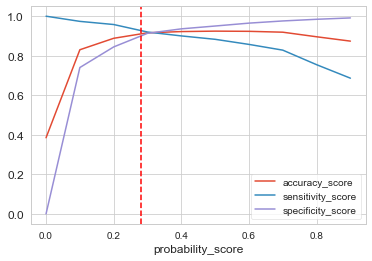

In [388]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.axvline(x=0.28, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

In [389]:
y_train_pred_final['final_Predicted']= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0        0      0.140840         3009          0    1    1    0    0    0   
1        0      0.079508         1012          0    1    0    0    0    0   
2        0      0.002955         9226          0    1    0    0    0    0   
3        1      0.929243         4750          1    1    1    1    1    1   
4        1      0.998668         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    1                1  
4    1    1    1    1    1                1

In [390]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Convert','Convert_Prob','Prospect ID','final_Predicted','Lead_Score']].head()

Convert  Convert_Prob  Prospect ID  final_Predicted  Lead_Score
0        0      0.140840         3009                0          14
1        0      0.079508         1012                0           8
2        0      0.002955         9226                0           0
3        1      0.929243         4750                1          93
4        1      0.998668         7987                1         100

In [391]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_Predicted))

Accuracy : 0.9143441977641317


In [392]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_Predicted )
confusion2

array([[3544,  361],
       [ 183, 2263]], dtype=int64)

In [393]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [394]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.9251839738348324
Specificity : 0.9075544174135723
False Positive rate :  0.09244558258642765
Positive Predictive Value : 0.8624237804878049
Negative Predictive Value :  0.9508988462570432


In [395]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3711,  194],
       [ 286, 2160]], dtype=int64)

In [396]:
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.9175870858113849


In [397]:
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.8830744071954211


In [398]:
from sklearn.metrics import precision_score, recall_score
print("Precision :",precision_score(y_train_pred_final.Convert , y_train_pred_final.predicted))
print("Recall :",recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Precision : 0.9175870858113849
Recall : 0.8830744071954211


In [399]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Convert, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [400]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

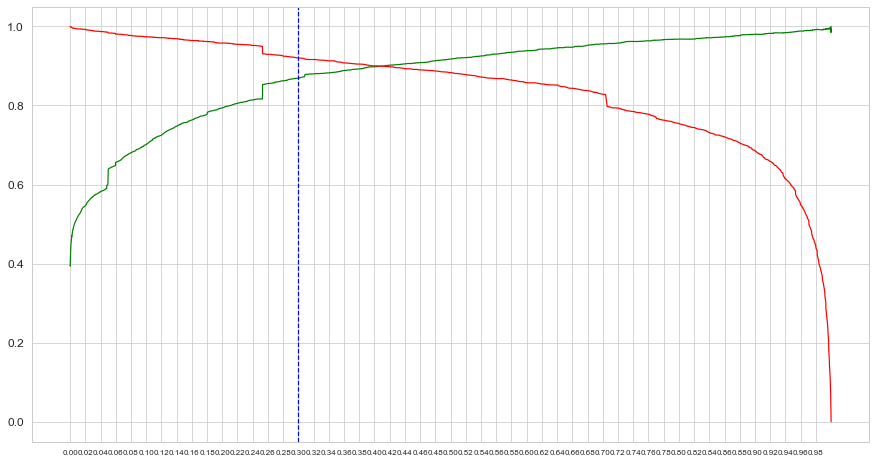

In [401]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.30, color='b', linestyle='--') 
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

In [402]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [403]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
3271                    -0.600595                                    0   
1490                     1.887326                                    1   
7936                    -0.752879                                    0   
4216                    -0.888650                                    0   
3830                    -0.587751                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3271                          0                        0   
1490                          0                        0   
7936                          0                        0   
4216                          1                        0   
3830                          0                        0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3271                       0                             0   
1490                       0                             0   
7936                       0                             0   
4216                       0                             0   
3830                       0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3271                            0                                 0   
1490                            0                                 0   
7936                            0                                 0   
4216                            0                                 0   
3830                            0                                 0   

      Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
3271                                      0                             0   
1490                                      0                             0   
7936                                      0                             0   
4216                                      0                             0   
3830                                      0                             0   

      Last Activity_SMS Sent  Last Activity_Unreachable  \
3271                       0                          0   
1490                       0                          0   
7936                       0                          0   
4216                       0                          0   
3830                       0                          0   

      Specialization_E-COMMERCE  Specialization_International Business  \
3271                          0                                      0   
1490                          0                                      0   
7936                          0                                      0   
4216                          1                                      0   
3830                          0                                      0   

      Specialization_Marketing Management  Specialization_Other  \
3271                                    0                     1   
1490                                    0                     0   
7936                                    0                     1   
4216                                    0                     0   
3830                                    0                     0   

      Specialization_Travel and Tourism  \
3271                                  0   
1490                                  0   
7936                                  0   
4216                                  0   
3830                                  0   

      What is your current occupation_Student  \
3271                                        0   
1490                                        0   
7936                                        0   
4216                                        1   
3830                                        0   

      What is your current occupation_Unemployed  \
3271                                           1   
1490                                           0   
7936                    

In [404]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.165447
1490    0.996317
7936    0.142815
4216    0.999771
3830    0.091422
1800    0.930239
6507    0.004352
4821    0.000896
4223    0.993235
4714    0.307937
dtype: float64

In [405]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
3271  0.165447
1490  0.996317
7936  0.142815
4216  0.999771
3830  0.091422

In [406]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.165447
1          1         1490  0.996317
2          0         7936  0.142815
3          1         4216  0.999771
4          0         3830  0.091422

In [407]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
y_pred_final

Converted  Prospect ID  Convert_Prob
0             0         3271      0.165447
1             1         1490      0.996317
2             0         7936      0.142815
3             1         4216      0.999771
4             0         3830      0.091422
...         ...          ...           ...
2718          0          850      0.070551
2719          0         2879      0.001687
2720          1         6501      0.995811
2721          0         7155      0.037834
2722          0          376      0.028318

[2723 rows x 3 columns]

In [408]:
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Convert_Prob'])

In [409]:
y_pred_final.head()

Prospect ID  Converted  Convert_Prob
0         3271          0      0.165447
1         1490          1      0.996317
2         7936          0      0.142815
3         4216          1      0.999771
4         3830          0      0.091422

In [410]:
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))
y_pred_final['final_Predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_pred_final.head()

Prospect ID  Converted  Convert_Prob  Lead_Score  final_Predicted
0         3271          0      0.165447          17                0
1         1490          1      0.996317         100                1
2         7936          0      0.142815          14                0
3         4216          1      0.999771         100                1
4         3830          0      0.091422           9                0

In [411]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Accuracy : 0.9081894968784429


In [412]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1566,  168],
       [  82,  907]], dtype=int64)

In [413]:
TP = confusion2[1,1]
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [414]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.917087967644085
Specificity : 0.903114186851211


In [415]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8437209302325581

In [416]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.917087967644085

In [417]:
print("Features used in Final Model :", col)

Features used in Final Model : Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Marketing Management', 'Specialization_Other',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 

In [418]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params.sort_values(ascending=False)

Tags_Lost to EINS                                       10.59
Tags_Closed by Horizzon                                  9.99
Tags_Will revert after reading the email                 4.92
Tags_Busy                                                4.76
Lead Source_Welingak Website                             3.75
Last Activity_SMS Sent                                   1.95
Tags_Other_Tags                                          1.62
Last Activity_Other Activity                             1.54
Lead Origin_Lead Add Form                                1.21
Total Time Spent on Website                              1.14
Tags_Interested  in full time MBA                        1.05
City_Tier II Cities                                      0.96
Tags_Interested in other courses                         0.96
Last Activity_Unreachable                                0.95
Lead Origin_Lead Import                                  0.95
Specialization_E-COMMERCE                                0.89
Lead Sou

In [419]:
top_predictors = new_params
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors.sort_values(ascending=False)

Tags_Lost to EINS                                       100.00
Tags_Closed by Horizzon                                  94.38
Tags_Will revert after reading the email                 46.47
Tags_Busy                                                44.93
Lead Source_Welingak Website                             35.45
Last Activity_SMS Sent                                   18.41
Tags_Other_Tags                                          15.28
Last Activity_Other Activity                             14.55
Lead Origin_Lead Add Form                                11.40
Total Time Spent on Website                              10.78
Tags_Interested  in full time MBA                         9.93
City_Tier II Cities                                       9.05
Tags_Interested in other courses                          9.03
Last Activity_Unreachable                                 8.98
Lead Origin_Lead Import                                   8.95
Specialization_E-COMMERCE                              

In [420]:
sorted_idx = np.argsort(top_predictors,kind='quicksort',order='list of str')
sorted_idx.sort_values(ascending=False)

Lead Source_Olark Chat                                  36
Lead Source_Welingak Website                            35
Tags_Not doing further education                        34
Lead Origin_Landing Page Submission                     33
Lead Origin_Lead Add Form                               32
Last Activity_Other Activity                            31
Total Time Spent on Website                             30
Last Activity_SMS Sent                                  29
City_Tier II Cities                                     28
What is your current occupation_Student                 27
Tags_wrong number given                                 26
What is your current occupation_Working Professional    25
Last Notable Activity_Olark Chat Conversation           24
Tags_Lost to EINS                                       23
Tags_Other_Tags                                         22
Last Notable Activity_Modified                          21
Lead Quality_Worst                                      

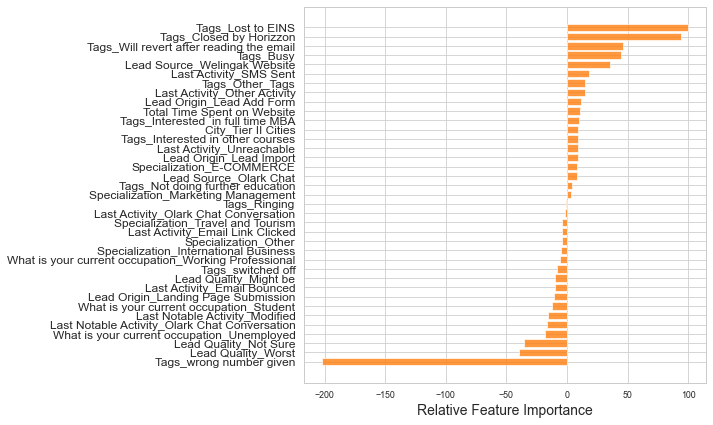

In [421]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, top_predictors[sorted_idx], align='center', color = 'tab:orange',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [422]:
pd.DataFrame(top_predictors).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
24                         Tags_Lost to EINS 100.00
21                   Tags_Closed by Horizzon  94.38
28  Tags_Will revert after reading the email  46.47